In [129]:
#important imports
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import array
import seaborn as sns
import pandas as pd
import os
from os.path import join, dirname, abspath
from matplotlib.transforms import Affine2D
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [130]:
load_filepath='/mnt/Data1/Arun/LMT/LMT_data/Excels2/LMT_Data_Frames_L7.xlsx' #filepath for loading the excel 
save_graphs_to="/mnt/Data1/Arun/LMT/LMT_data/Excels2/Sign_L7"
if not os.path.exists(save_graphs_to):
    os.makedirs(save_graphs_to)
    print("declared directory not found, creating directory")
sorting = pd.read_excel (load_filepath,engine='openpyxl') 
sorting["Group"]
sorting['Genotype'] = sorting["Group"].str.extract('(.*?)_std1')
sorting['Sex'] = sorting['Group'].str.extract('_std1_(.*?)_')
sorting['Housing'] = sorting['Group'].str.extract('_std1_.*?_(.*)')


In [131]:
g1array=sorting["Genotype"]
g3array=sorting["Sex"]
g2array=sorting["Housing"]
bigtest=sorting.iloc[:,2:-3]

In [132]:
Sign=np.zeros((7,len((bigtest.iloc[0,:]))))
for i in range(len((bigtest.iloc[0,:]))):
    dfb = pd.DataFrame({'Genotype': g1array,
                   'Sex': g3array,
                   'housing': g2array,
                   'label': bigtest.iloc[:,i]})
    dfb
    model = ols("""label ~ C(Genotype) + C(Sex) + C(housing) +
               C(Genotype):C(Sex) + C(Genotype):C(housing) + C(Sex):C(housing) +
               C(Genotype):C(Sex):C(housing)""", data=dfb).fit()
    Sign[:,i]=sm.stats.anova_lm(model, typ=2)['PR(>F)'][:-1]
print(Sign)

[[7.87385807e-01 9.32967843e-01 7.69597642e-01 5.89334366e-01
  6.21136399e-01 6.54102606e-01 2.15979604e-01 2.80704361e-01
  5.06744620e-01 8.52839405e-01 4.73684534e-01 5.77741220e-01
  9.21812066e-01 5.30825912e-01 8.61415534e-01 3.81171875e-01
  7.37930421e-01 8.87338203e-01 7.60132937e-01 2.81743558e-01
  8.33062931e-01 8.87527253e-01 7.38455350e-01 6.94169654e-01
  7.02623444e-01 9.33350699e-01 6.51485403e-01 5.48137172e-01
  6.35824079e-01]
 [9.71591818e-01 1.94966739e-01 7.05991555e-03 8.15788909e-01
  8.02374581e-01 4.19681033e-01 1.61955711e-01 1.22667514e-02
  9.95422953e-01 2.72640745e-02 4.50248890e-01 6.03888772e-01
  9.87787235e-02 1.87518139e-01 4.37694979e-01 7.59838955e-02
  7.38887125e-01 4.41827046e-01 5.36522240e-01 5.34733239e-03
  2.26582743e-02 5.75112873e-02 2.14049033e-02 5.70508913e-03
  1.66105855e-02 1.99055125e-01 2.57468705e-01 4.32536123e-01
  4.12091467e-01]
 [4.08127839e-04 1.43779680e-08 2.28963108e-04 3.57541210e-01
  1.58683764e-05 1.03508753e-04 9.

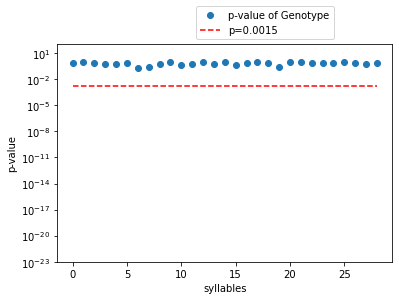

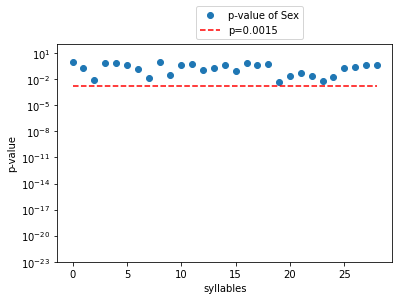

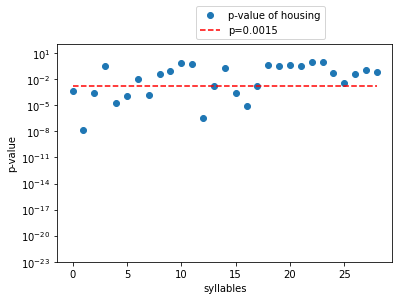

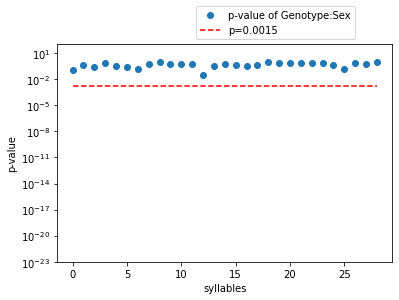

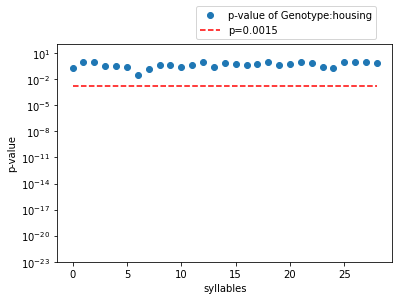

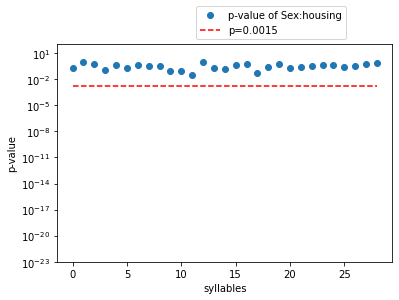

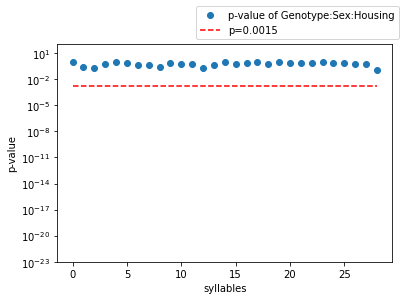

In [133]:
labels=['Genotype','Sex','housing','Genotype:Sex','Genotype:housing','Sex:housing','Genotype:Sex:Housing']
line=np.repeat([0.0015],len((bigtest.iloc[0,:])))
for i in range(7):
    
    plt.figure()
    #plt.title("signficance for "+labels[i]+" of all syllables")
    plt.plot(Sign[i,:],linestyle="",marker="o")
    plt.plot(line,linestyle='--',color='r')
    plt.yscale("log")
    plt.ylim([10**-23, 100])   
    plt.ylabel('p-value')
    plt.xlabel('syllables')
    #plt.xticks(range(len((bigtest.iloc[0,:]))),range(len((bigtest.iloc[0,:]))))
    plt.legend(['p-value of '+labels[i],'p=0.0015'],bbox_to_anchor=(0.4,1))
    filename=labels[i]+"_p-value.svg"
    plt.savefig(join(save_graphs_to,filename), format = 'svg', dpi=300)

In [134]:
Sign_df = dict(zip(bigtest.columns, Sign.T))
Sign_df = pd.DataFrame(Sign_df)
Sign_df.index=labels
filename="p-values.xlsx"
Sign_df.to_excel(join(save_graphs_to,filename))
